In [1]:
# -*- coding: utf-8 -*-
"""ResNet 음식 분류 모델

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1SK_9xQBKO2Dft-LrAw5KKwRQ4JdVs_Cy

1. 이미지 크롤링(image crawling) 혹은 크롤링 라이브러리(bing image downloader 사용)
    2. 전이 학습(transfer learning)
    3. 웹 API 개발

    * 데이터 수집/정제
    * 인공지능 모델 학습
    * 학습된 모델 배포
* 한글 폰트 설치 이후에 <b>[런타임] - [런타임 다시 시작]</b>을 수행


# 한글 폰트 설치하기 
!apt install fonts-nanum -y
"""


import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


In [2]:
"""
# 한글 폰트 설정하기
fontpath = '/window/fonts/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
# matplotlib.font_manager._rebuild()
"""

"\n# 한글 폰트 설정하기\nfontpath = '/window/fonts/NanumBarunGothic.ttf'\nfont = fm.FontProperties(fname=fontpath, size=10)\nplt.rc('font', family='NanumBarunGothic')\n# matplotlib.font_manager._rebuild()\n"

In [1]:
"""
# 필요한 라이브러리 설치하기

"""
!git clone https://github.com/ndb796/bing_image_downloader
"""#### <b>1. 이미지 크롤링을 활용한 학습 이미지 수집</b>

* 수집한 이미지를 저장하기 위한 폴더를 생성하고, 필요한 함수를 정의
"""
import os
import shutil
from bing_image_downloader import downloader

'git'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [2]:
directory_list = [
    './custom_dataset/train/',
    './custom_dataset/test/',
]

# 초기 디렉토리 만들기
for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# 수집한 이미지를 학습 데이터와 평가 데이터로 구분하는 함수
def dataset_split(query, train_cnt):
    # 학습 및 평가 데이터셋 디렉토리 만들기
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + query):
            os.makedirs(directory + '/' + query)
    # 학습 및 평가 데이터셋 준비하기
    cnt = 0
    for file_name in os.listdir(query):
        if cnt < train_cnt:
            print(f'[Train Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/train/' + query + '/' + file_name)
        else:
            print(f'[Test Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/test/' + query + '/' + file_name)
        cnt += 1
    shutil.rmtree(query)

In [3]:

"""* <b>음식</b> 이미지 크롤링을 진행하고 데이터셋을 구축"""
food_list = [ '돼지국밥', '소머리국밥', '콩나물국밥', '설렁탕', '갈비탕', '매운탕', '감자탕', '마라탕', '마라샹궈', '된장찌개', '김치찌개', 
        '부대찌개' , '순두부찌개', '버섯전골', '샤브샤브', '나베', '낙곱새', '갈비', '생선구이', '고기구이', '비빔밥', '볶음밥', '덮밥',
        '초밥', '회덮밥', '육회', '돈까스', '생선까스','해물찜', '족발', '보쌈', '스테이크', '폭립', '치킨', '피자' ,'햄버거', '샌드위치',
        '짜장면', '짬뽕', '탕수육', '깐풍기', '꿔바로우', '냉면', '라면', '떡국', '국수', '파스타', '김밥', '죽', '샐러드', '토스트']

for food in food_list :
    
    downloader.download(food, limit=1,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
    #40개의 데이터셋
    # dataset_split(food, 18)
    #dataset 45개를 train dataset으로 나머지는 test용




[%] Downloading Images to C:\Users\JIHO\Documents\GitHub\food-recommendation-app\사진인식 test\돼지국밥


[!!]Indexing page: 1

[%] Indexed 1 Images on Page 1.


[%] Downloading Image #1 from https://mp-seoul-image-production-s3.mangoplate.com/17042/223584_1435720757266285767
[%] File Downloaded !



[%] Done. Downloaded 1 images.
[%] Downloading Images to C:\Users\JIHO\Documents\GitHub\food-recommendation-app\사진인식 test\소머리국밥


[!!]Indexing page: 1

[%] Indexed 1 Images on Page 1.


[%] Downloading Image #1 from https://mp-seoul-image-production-s3.mangoplate.com/340593/746651_1515641214460_3837
[%] File Downloaded !



[%] Done. Downloaded 1 images.
[%] Downloading Images to C:\Users\JIHO\Documents\GitHub\food-recommendation-app\사진인식 test\콩나물국밥


[!!]Indexing page: 1

[%] Indexed 1 Images on Page 1.


[%] Downloading Image #1 from https://recipe1.ezmember.co.kr/cache/recipe/2017/07/04/c64a2e8fc862e0cb15f451890789d9561.jpg
[%] File Downloaded !



[%] Done. Downloaded 1 images.
[%] Downloading

[%] Indexed 1 Images on Page 1.


[%] Downloading Image #1 from http://recipe.ezmember.co.kr/cache/recipe/2016/06/08/6140461616b8aad0e18488967660d4411.jpg
[%] File Downloaded !



[%] Done. Downloaded 1 images.
[%] Downloading Images to C:\Users\JIHO\Documents\GitHub\food-recommendation-app\사진인식 test\초밥


[!!]Indexing page: 1

[%] Indexed 1 Images on Page 1.


[%] Downloading Image #1 from http://t1.daumcdn.net/liveboard/mango/f2196fe059cd4630ab57ad131bcc5964.JPG
[%] File Downloaded !



[%] Done. Downloaded 1 images.
[%] Downloading Images to C:\Users\JIHO\Documents\GitHub\food-recommendation-app\사진인식 test\회덮밥


[!!]Indexing page: 1

[%] Indexed 1 Images on Page 1.


[%] Downloading Image #1 from https://newsimg.hankookilbo.com/cms/articlerelease/2016/05/31/201605312042227155_1.jpg?t=20210416090102
[%] File Downloaded !



[%] Done. Downloaded 1 images.
[%] Downloading Images to C:\Users\JIHO\Documents\GitHub\food-recommendation-app\사진인식 test\육회


[!!]Indexing page: 1

[%] Indexed 1 I

[%] Indexed 1 Images on Page 1.


[%] Downloading Image #1 from https://t1.daumcdn.net/cfile/tistory/9921A9485A47205706
[%] File Downloaded !



[%] Done. Downloaded 1 images.
[%] Downloading Images to C:\Users\JIHO\Documents\GitHub\food-recommendation-app\사진인식 test\국수


[!!]Indexing page: 1

[%] Indexed 1 Images on Page 1.


[%] Downloading Image #1 from https://t1.daumcdn.net/cfile/tistory/242BD33A580E52DF15
[%] File Downloaded !



[%] Done. Downloaded 1 images.
[%] Downloading Images to C:\Users\JIHO\Documents\GitHub\food-recommendation-app\사진인식 test\파스타


[!!]Indexing page: 1

[%] Indexed 1 Images on Page 1.


[%] Downloading Image #1 from http://blogfiles.naver.net/20100327_69/cateye99_1269649571962R6f05_jpg/레시피_-_봉골레_파스타_(14)_cateye99.jpg
[!] Issue getting: http://blogfiles.naver.net/20100327_69/cateye99_1269649571962R6f05_jpg/레시피_-_봉골레_파스타_(14)_cateye99.jpg
[!] Error:: 'ascii' codec can't encode characters in position 49-51: ordinal not in range(128)


[!!]Indexing page: 2

[%]

In [6]:
"""Pytorch 활용 전이학습(Transfer Learning)
* 학습을 위해 필요한 라이브러리 불러온다.

---
"""

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import time

def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()

In [7]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체
print(torch.cuda.is_available())
"""* 데이터셋을 불러온다."""

# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),#파이토치에서는 이미지를 tensor로 변환시켜줘야 함
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_dir = './custom_dataset'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True, num_workers=4)

print('학습 데이터셋 크기:', len(train_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)

True
학습 데이터셋 크기: 54
테스트 데이터셋 크기: 54
클래스: ['감자탕', '김치찌개', '냉면']


C:\Users\JIHO\anaconda3\envs\torch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45257 (\N{HANGUL SYLLABLE NAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JIHO\anaconda3\envs\torch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JIHO\anaconda3\envs\torch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JIHO\anaconda3\envs\torch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JIHO\anaconda3\envs\torch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53461 (\N{HANGUL SYLLABLE TANG}) missing from current font.
  fig.canvas.

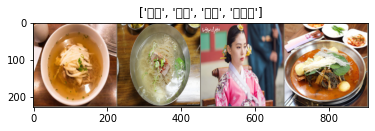

In [8]:

"""이미지 시각화 후 테스트


"""

def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [9]:
"""* 학습할 CNN 딥러닝 모델 객체를 초기화합니다."""

model = models.resnet50(pretrained=True)
num_features = model.fc.in_features
#전이학습 : 모델의 출력 뉴런 수를 교체하여 마지막 레이어는 다시 학습한다.
model.fc = nn.Linear(num_features, 3) #음식 분류 수에 따라 조정해야 한다. 3-> 20 -> 30
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


In [10]:
"""* 학습"""

num_epochs = 5
model.train()
start_time = time.time()

# 전체 반복(epoch) 수 만큼 반복하며
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.

    # 학습 과정 중에 결과 출력
    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

#0 Loss: 1.2543 Acc: 29.6296% Time: 13.2005s
#1 Loss: 1.3856 Acc: 35.1852% Time: 21.7854s
#2 Loss: 1.2844 Acc: 50.0000% Time: 35.9117s
#3 Loss: 0.5786 Acc: 72.2222% Time: 50.0961s
#4 Loss: 0.3938 Acc: 88.8889% Time: 64.2463s


In [11]:
torch.save(model,"model_3.pt")

[예측 결과: 냉면] (실제 정답: 냉면)


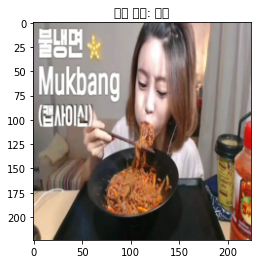

[예측 결과: 김치찌개] (실제 정답: 감자탕)


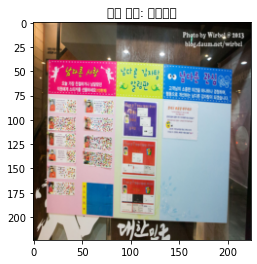

[예측 결과: 김치찌개] (실제 정답: 김치찌개)


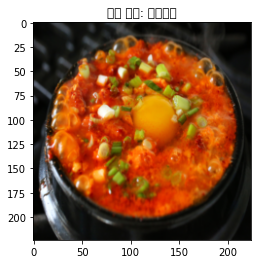

[예측 결과: 감자탕] (실제 정답: 김치찌개)


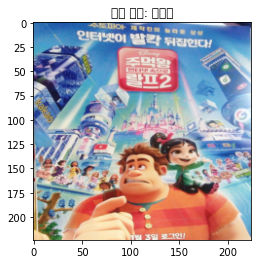

[예측 결과: 냉면] (실제 정답: 감자탕)


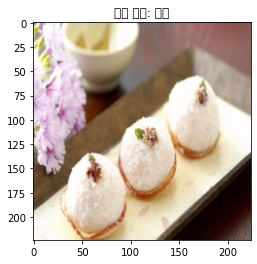

[예측 결과: 냉면] (실제 정답: 김치찌개)


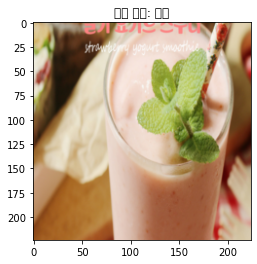

[예측 결과: 냉면] (실제 정답: 김치찌개)


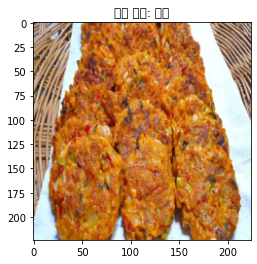

[예측 결과: 냉면] (실제 정답: 냉면)


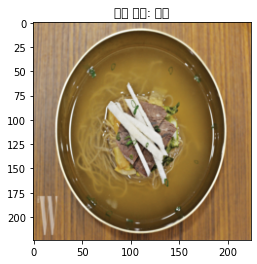

[예측 결과: 냉면] (실제 정답: 냉면)


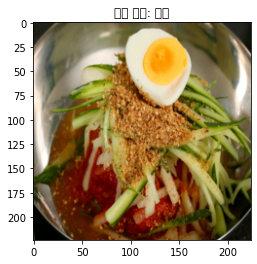

[예측 결과: 냉면] (실제 정답: 김치찌개)


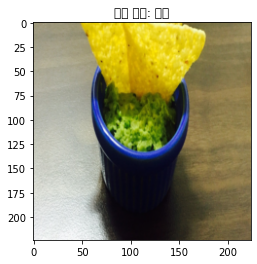

[예측 결과: 김치찌개] (실제 정답: 냉면)


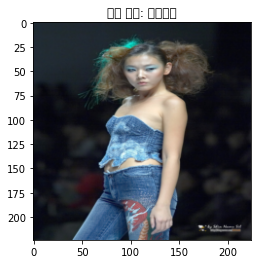

[예측 결과: 감자탕] (실제 정답: 감자탕)


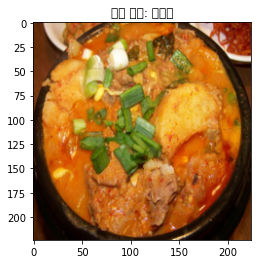

[예측 결과: 김치찌개] (실제 정답: 냉면)


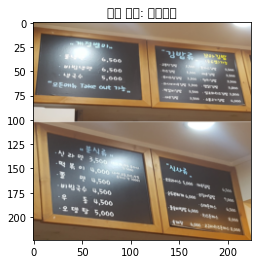

[예측 결과: 감자탕] (실제 정답: 감자탕)


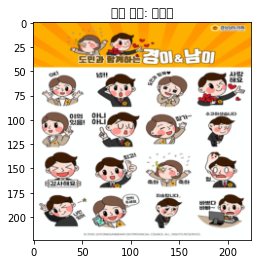

[Test Phase] Loss: 1.1091 Acc: 33.3333% Time: 4.5719s


In [35]:
"""학습된 모델 평가

"""
torch.save(model.state_dict(), "model1.pt")
model.load_state_dict(torch.load("model1.pt"))
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

In [ ]:
"""#### <b>3. 분류 모델 API</b>

* 분류 모델을 어플에서 사용할 수 있게 API를 개발하여 배포
* 한 장의 이미지를 Storage로부터 읽어와 분류 결과를 반환

"""

# 테스트용 이미지 다운로드하기
!wget https://cdn.dominos.co.kr/admin/upload/goods/20200311_x8StB1t3.jpg -O test.jpg

from PIL import Image


image = Image.open('test.jpg')
image = transforms_test(image).unsqueeze(0).to(device)

with torch.no_grad():
    outputs = model(image)
    _, preds = torch.max(outputs, 1)
    imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

In [26]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce GTX 1660 Ti'

In [ ]:
"""* API 개방을 위해 <b>Ngrok</b> 서비스를 이용
* API 기능 제공을 위해 <b>Flask 프레임워크</b>를 사용
"""

# 필요한 라이브러리 설치하기
!pip install flask-ngrok

import io
from flask_ngrok import run_with_ngrok
from flask import Flask, jsonify, request


# 이미지를 읽어 결과를 반환하는 함수
def get_prediction(image_bytes):
    image = Image.open(io.BytesIO(image_bytes))
    image = transforms_test(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image)
        _, preds = torch.max(outputs, 1)
        imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    return class_names[preds[0]]


app = Flask(__name__)


@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        # 이미지 바이트 데이터 받아오기
        file = request.files['file']
        image_bytes = file.read()

        # 분류 결과 확인 및 클라이언트에게 결과 반환
        class_name = get_prediction(image_bytes=image_bytes)
        print("결과:", {'class_name': class_name})
        return jsonify({'class_name': class_name})

In [ ]:
"""* 서버 주소를 정확히 확인"""

run_with_ngrok(app)
app.run()

"""* 클라이언트 테스트 방법

<pre>
curl -X POST -F file=@{이미지 파일명} {Ngrok 서버 주소}
</pre>

* 사용 예시

<pre>
curl -X POST -F file=@1.jpg http://c4cdb8de3a35.ngrok.io/
</pre>

"""